In [6]:
%display typeset


# Tutoriel SAGE
(Éte 2017, revue en temps de pandémie, un peu à la va vite)

## Une introduction éclair.

Si vous lisez ceci c'est parce que vous avez ouvert une session du notebook de SAGE, ou encore que vous l'ex&eacute;cutez dans un des serveurs d&eacute;di&eacute;s. Comme bien de logiciels, SAGE peut aussi &ecirc;tre utilis&eacute; via le terminal, mais laissons de c&ocirc;t&eacute; cette approche pour l'instant.
Vous verrez plusieurs "cellules" où on doit entrer le code SAGE.

On peut entrer du texte en utilisant `markdown`, $\LaTeX$, ou `html` ce qui est très bien si on veut écrire des équations.

+ Sur CoCalc, ave un fichier '.sagews' il suffit de commencer le texte par `%md`. Les commandes $\LaTeX$ incluses seront comprises.
+ La même chose s'applique sur un notebook `JuPyteR` (comme celui-ci).


Faites un double click sur ce texte, on trouvera la source et on pourra l'éditer. Corrigez ceci : $\frac{1}{2} + \frac{1}{3} = \frac{1+1}{2+3} = \frac{2}{5}$.

Bien entendu, le résultat est $\frac{5}{6}$. SAGE sait faire ceci, et bien d'autre choses. Pour exécuter les commandes / calculs d'une cellule, il faut faire `Shift + Entrée`. Faites-le après la cellule ci-bas, une fois directement, puis une autre après avoir coché la case

In [7]:
1/2+1/3

5/6

Si on veut une valeur approximation décimale on doit faire:

In [3]:
5/6.n()

ou encore

In [4]:
5.0/6

Vous le devinez, SAGE sait reconnaître le type d'objets... pour les rationnels, il opère de façon exacte, on doit court-circuiter un peu ceci pour avoir une valeur décimale.

In [5]:
pi+1

In [6]:
(pi+1).n()

In [7]:
pi+1.0

In [8]:
numerical_approx(pi+1,digits=50)

### Deux astuces importantes quand on cherche à faire un calcul avec SAGE:
- `Tab`  si vous commencez à écrire une commande, puis appuyez sur la touche `TAB`, les commandes commençant comme celle que vous avez commencé à entrer s'afficheront. Vous pouvez alors en choisir une, puis

- ? le point d'interrogation après une commande, suivi de `Shift + Entrée` ramène à la documentation de la commande en question, ce qui comporte des exemples.

Faites `Tab` dans la cellule ci-bas.

In [ ]:
numerical_

### Variables et quelques calculs symboliques

Faisons quelques calculs symboliques. Il faut déclarer les indéterminées, toutes sauf $x$.

In [8]:
var('t,s')
f(s,t)=s*cos(s*t)

In [ ]:
diff(f(s,t),t)

In [ ]:
diff(f(s,t),s,2)

In [ ]:
integrate(f(s,t),s)

In [ ]:
f(1,pi/4)

In [ ]:
integrate(1/t,t,1,2)

In [ ]:
factor(x^2+2*x+1)

Pour résoudre des équations, on entre la liste des équations (avec deux signes d'égalité), puis la liste des variables:

In [ ]:
solve([2*x+1==0],[x])

In [ ]:
var('s,t')
solve([s+t==3,s-t==1],[s,t])

Bien entendu on a intérêt à faire `solve?` puis Entrée.

### Listes et repétition

Faire des listes ou des ensembles est très facile, la syntaxe est presque celle qu'on utilise en maths: $\{n^2| 0\leq n \leq 10\}$ s'obtient au moyen de:

In [ ]:
Liste = [n^2 for n in range(11)]

In [ ]:
Liste

Le $0$-ème élément de la liste est le premier... euh... un exemple!

In [ ]:
Liste[3]

In [ ]:
Liste[2:7]

In [ ]:
sum(Liste)

### Quelques graphiques

Quelques graphiques maintenant. En 2d, pour commencer.

In [ ]:
C1=plot(sin(x),(x,-3* pi,3*pi),color='red', thickness=2)

In [ ]:
show(C1,figsize=[4,2])

In [ ]:
show(C1,aspect_ratio=1)

On peut créer les objets graphiques séparément, puis les montrer ensemble. Plus haut nous avons crée le graphique de la fonction $x\mapsto \sin{x}$ pour $x\in [-3\pi, 3\pi]$, en rouge. Traçons maintant la courbe de la fonction $x\mapsto \frac{1}{2} \cos{2x}$ pour $x\in [- \pi, 3\pi]$, en bleu et pointillés.

In [ ]:
C2=plot(0.5*cos(2*x),x,-pi,3*pi, color='blue',thickness=3,linestyle='dotted')

In [ ]:
show(C1+C2,figsize=[3,3])

Disons que je veux calculer une approximation d'une intégrale, naïvement. Pensons à $f(x)= - x \ln{2 x}$ entre $0$ et $2$. On va commencer par d&eacute;finir la fonction, puis faire une somme de Riemann avec les points milieux.

+ $n$ va &ecirc;tre le nonbre de divisions, le pas ici est donc $\Delta x = \frac{2}{n}$
+ Pour chaque $i$ entre $1$ et $n$, on construira $x_i = 0+ i \Delta x = \frac{2i}{n}$
+ Le point mileu de chaque intervale se construit facilement, c'est $(x_i + x_{i+1})/2$
+ On doit après évaluer $f$ en ces points, multiplier par $\Delta x$ puis additionner.

On fera les choses avec des listes, mais bien sur, &ccedil;a se fait avec des boucles.

In [9]:
var('a,b,n') # Déclaration de paramètres / variables / indéterminées
a=0
b=2
n=100
dx=(b-a)/n
f(x)=-x*log(2*x)
PtsX=[2*j/n for j in range(n+1)]

On crée la liste des points milieux.

In [ ]:
Mil=[(b-a)/(2*n)+j*dx for j in range(n)]

On évalue $f$ en chacun de ces points.

In [ ]:
F=[f(Mil[j])*dx for j in range(n)]

On calcule la somme, en mettant `.n()` à la fin, pour forcer un résultat en notation décimale.

In [ ]:
sum(F).n()

Mais bien entendu SAGE peut faire le calcul exact de cette intégrale (et plusieurs autres).

In [ ]:
reponse = integrate(-x*log(2*x),x,a,b)
reponse
reponse.n()

### COURBES ORTHOGONALES

Un autre exemple : dessiner les courbes orthogonales aux courbes $y=c\sin{x}$. Pour chaque valeur de $c\in \mathbb{R}$ on considère la courbe $\mathcal{S}_c$ d'équation $y=c\sin{x}$.

Ci bas on a dessiné les courbes corerspondant aux valeurs de $c$ qui varient entre -4 et 4 par pas de .5 (la dernière valeur est exclue, il s'agit d'une liste) elles sont en bleu dans la figure plus bas.

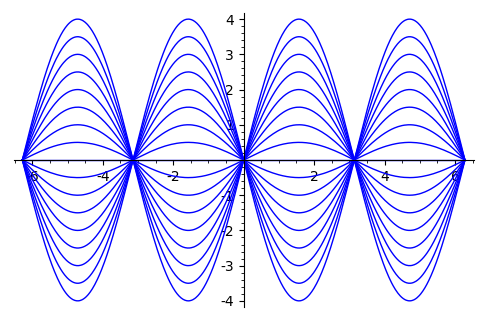

In [9]:
var('c,x,y')
F1=[plot(c*sin(x),(x,-2*pi,2*pi),color='blue', aspect_ratio=1) for c in sxrange(-4,4.5,.5)]# En réalité un crée un e liste de courbes, qu'on superpose.
show(sum(F1),figsize=5)

On cherche une famille de coubes (rouges) qui coupent chacune des courbes bleues, et en chaque point d'intersection les tangentes aux courbes bleues sont orthogonales aux tangentes aux courbes rouges (voir le résultat plus bas).


De l'équation $y=c\sin{x}$ on tire directement $y'=c\cos{x}$, de sorte qu'en chaque point $(x,y)$ d'une courbe bleue $S_c$, la pente de la tangente est précisément $c\cos{x}$. La pente d'une droite orthogonale est le négatif de l'inverse, c'est à dire $-\frac{1}{c\cos{x}}$. On cherche donc $y'=-\frac{1}{c\cos{x}}$. De l'équation originale on peut éliminer $c=\frac{y}{\sin{x}}$, de sorte que, en remplaçant on trouve l'équation différentielle $$y'=-\frac{\tan{x}}{y} $$

Ceci peut se résoudre sans trop de peine, car c'est une équation à variables séparables, au pire une table d'intégrales donne l'intégrale de $\tan{x}$. Mais essayons plutôt de le faire avec SAGE.

In [10]:
y=function('y')(x)
eq = diff(y,x)==-tan(x)/y
desolve(eq,y,show_method=True)

[-1/2*y(x)^2 == _C + log(sec(x)), 'separable']

Quelques remarques:

+ L'option show_method = True demande à SAGE de nous dire comment il a fait pour résoudre l'équation différentielle. Comme nous, il s'est rendu compte qu'il s'agissait d'une équation aux variables séparables.
+ Dans la solution présentée par SAGE il y a une constante d'intégration $c$, nous obtenons donc pour chaque valeur de $c$ une nouvelle courbe. Ce n'est pas le même $c$ que nous avions déjà.
+ Le terme $\ln{\sec{x}}$ vient d'intégrer $\tan{x}$. Or en réalité $\displaystyle \int \tan{x} dx = \ln{|\sec{x}|}  +k$, il manque la valeur absolue, et le $k$ que nous avons ici est la constante ci-haut.
+ Les courbes de la famille orthogonale sont des courbes données implicitement (c'est ce qu'on obtient quand on résoud l'équation différentielle). On peut les tracer comme telles, il s'agit des courbes $y^2+2\cdot \ln{|\sec{x}|} = Ky$

Trouvez comment ceci est fait avec la commande implicit_plot.

/home/jcb/Programs/sage-9.0-Ubuntu_18.04-x86_64/SageMath/local/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


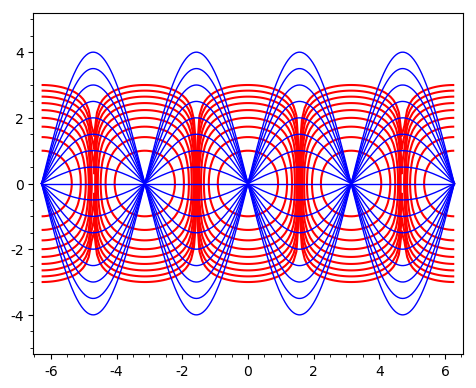

In [11]:
var('c,x,y')
F1=[plot(c*sin(x),(x,-2*pi,2*pi),color='blue', aspect_ratio=1) for c in sxrange(-4,4.5,.5)]
#show(sum(F1))
F2=[implicit_plot(y^2+2*log(abs(sec(x)))-c,(x,-2*pi,2*pi),(y,-5,5),color='red',aspect_ratio=1) for c in sxrange(-10,10,1)]
show(sum(F2)+sum(F1))

Notez que les listes F1 et F2 sont les listes de courbes, donc d'objets graphiques. Ainsi, afficher la somme des listes, affiche toutes les courbes des listes. Probablement ce n'est pas la chose la plus efficace à faire...

Que se passe-t-il si on laisse tomber les valeurs absolues?

Voyons maintenant quelques courbes en coordonnées polaires. Habituellement, on écrit $r=f(\theta)$, si on donne l'équation explicitement.

Par exemple, $r=\cos{\theta}$ est un cercle, car en multipliant les deux côtés par $r$ on obtient $r^2 = r \cos{\theta}$, ou encore $x^2+y^2 = x$ ce qui équivaut à $(x-\frac{1}{2})^2+ y^2 = \frac{1}{4}$

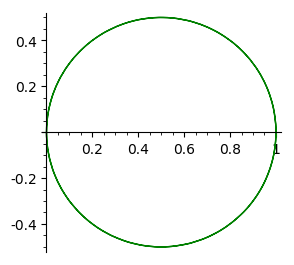

In [13]:
var('t')
polar_plot(cos(t),t,0,2*pi, color='green').show(figsize=[3,3])

Finalement, les courbes paramétriques $\mathbf{r}(t) = (x(t),y(t))$ pour $t\in[a,b]$

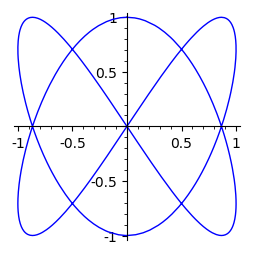

In [14]:
var('t')
Courbe=parametric_plot([sin(2*t),cos(3*t)],(t,0,2*pi))
Courbe.show(figsize=4)

### Un peu d'algèbre linéaire

Voyons maintenant comment faire les manipulations usuelles en algèbre linéaire : déclarer des vecteurs, faire le produit vectoriel (pour les vecteurs dans $\mathbb{R}^3$), produit scalaire, norme... et il en va de même pour les matrices.

In [ ]:
u=vector([-1,-3,1])
v=vector([4,2,8])
w=u.cross_product(v)

In [ ]:
w

In [ ]:
v.cross_product(u)

In [ ]:
u.dot_product(v)

In [ ]:
u.norm()

In [ ]:
norm(u)

In [ ]:
u+v

In [ ]:
A1=matrix([[1,1,0,0,0,0],[0,1,1,0,0,0],[1,0,1,0,0,0],[0,0,1,1,0,0],[0,0,0,1,1,0],[0,0,0,0,1,1]])
A1

In [ ]:
det(A1)

In [ ]:
A1.inverse()

In [ ]:
A1^4

### Polynomes de Taylor

Pour finir, un peu de polynômes de Taylor, en une ou deux variables.

In [15]:
f(x)=sin(x)
Taylorf = taylor(f(x),x,0,12)
Taylorf

On peut, bien sur calculer plusieurs polynômes d'un seul coup, et faire les dessins sur une même figure. Ci-bas le graphique de la fonction $x\mapsto \sin{x}$ sur $[-2\pi,2\pi]$ (c'est ce que le paramètre $L$ contrôle), et les plynômes de Taylor de degrés inférieurs à 20. On remarquera comment on fait changer les couleurs des courbes.

Par ailleurs, on a intérêt à faire `Taylor?`.

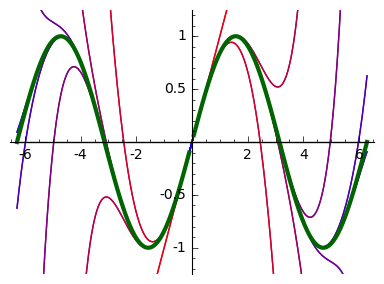

In [16]:
N=20
L=2
Curvef=plot(f,-L*pi,L*pi,color='darkgreen',thickness=3,detect_poles=True)
TaylorPolys=sum([plot(taylor(f(x),x,0,j) ,-L*pi,L*pi, color=((N-j)/N,0,j/N),thickness=1) for j in range(N)])
show(TaylorPolys+Curvef,ymin=-1.2,ymax=1.2,figsize=4)

Voici comment calculer le polynôme de Taylor autour de $x=1$, on obtient une somme de puissances de $(x-1)$.

In [17]:
taylor(f(x),x,1,6)

Finalement, en deux variables: Calculons le polynôme de Taylor de degré $4$ de la fonction $x\mapsto x \cos(y)$ autour du point $(0,-1)$.

In [18]:
var('y')
taylor(x*cos(y),(x,0),(y,-1),4)

Bien entendu, ceci pourrait se faire (dans ce cas) comme le produit de deux polynomes de Taylor (attention aux degrés)

In [19]:
taylor(x,x,0,4)*taylor(cos(y),y,-1,4)

### Quelques graphiques en 3D

On peut dessiner les surfaces de plusieurs façons différentes, dépendament de comment la surface est spécifiée:

- Paramétriquement, c'est à dire $\vec{r}:\mathcal{D}\to \mathbb{R}^3$ donnée par $\vec{r}(u,v)=x(u,v)\mathbf{e}_1 + y(u,v)\mathbf{e}_2 + z(u,v)\mathbf{e}_3$ est une paramétrisation d'une surace $\mathcal{S}$. Ici on suppose que $(u,v)\in \mathcal{D}$.
- Explicitement, c'est à dire si $\mathcal{S}$ est l'ensemble des points $(x,y,z)$ tels que $z=f(x,y)$, pour $(x,y)\in \mathcal{D}$.
- Implicitement, c'est à dire si $\mathcal{S}$ est l'ensemble des points $(x,y,z)$ tels que $F(x,y,z)=0$.

Voyons quelques exemples.

Exemple : dessiner la région de l'espace comprise entre les surfaces $S_1:z=x^2+3y^2$ et $S_2:z=8-x^2-y^2$

Dessinons les deux surfaces explicitement:

In [18]:
var('x,y')
f(x,y)=x^2+3*y^2
g(x,y)=8-x^2-y^2
S1=plot3d(f(x,y),(x,-2,2),(y,-1.5,1.5),color='darkseagreen', opacity=0.65, mesh= "True")
S2=plot3d(g(x,y),(x,-2,2),(y,-1.5,1.5),color='darkgreen', opacity=0.65, mesh= "True")
show(S1+S2, aspect_ratio=[2,2,1])

Graphics3d Object

Le graphique n'est pas tellement beau, essentiellement parce que $(x,y)$ décrivent un rectangle. L'idéal serait que seulement les valeurs de $(x,y)$ qui se trouvent sous la région commune soient considérées.

Pour ceci, on paramétrise les surfaces (on verra en détail comment faire dans le cours, on peut simplement ignorer les calculs qui suivent):

+ Calculons d'abord l'intersection des deux surfaces, c'est à dire $$\displaystyle x^2+3y^2= 8-x^2-y^2$$

+ C'est l'équation d'une ellipse, à savoir $\displaystyle \left(\frac{x}{2}\right)^2+ \left(\frac{y}{\sqrt{2}}\right)^2=1$.

	+ Une paramétrisation de celle-ci est $x(u)=2\cos(u),\ y(u)=\sqrt{2}\sin{u}$ pour $u\in[0,2\pi]$. La courbe d'intersection entre les deux surfaces est $(x(u),y(u),f(x(u),y(u)))$ où $u\in [0,2\pi]$.



+ On va utiliser la paramétrisation des surfaces, pour que les dessins soient plus beaux... Les paramètres seront en quelque sorte les coordonnées polaires, mais avec les noms $u,v$. Ainsi $x(u,v)=2 v \cos{u}$, et $y(u,v)=v \sqrt{2} \sin{u}$ pour $0\leq v \leq 1$ et $0\leq u \leq 2\pi$ est une description de l'ellipse et tout ce qu'il y a dans son intérieur:  en effet on "multiplie" l'ellipse par le paramètre $v$ qui varie entre $0$ et $1$, ca remplit la région enfermée par l'ellipse. Pour ce qui est de l'ellipse il suffit de faire $v=1$.



Les surfaces sont ainsi $S_1: z=f(x(u,v), y(u,v))$, ou, paramétriquement $(x,y,z)= (x(u,v),y(u,v),f(x(u,v),y(u,v))$. Pour $S_2$ c'est pareil.

In [19]:
var('u,v')
x(u,v)=2*cos(u)*v
y(v,v)=sqrt(2)*sin(u)*v

In [24]:
Ellipse=parametric_plot3d([x(u,1),y(u,1),0],(u,0,2*pi), color='darkgreen', thickness=2)
Courbe=parametric_plot3d([x(u,1),y(u,1),f(x(u,1),y(u,1))],(u,0,2*pi), color='darkgreen', thickness = 3)
S1=parametric_plot3d([x(u,v),y(u,v),f(x(u,v),y(u,v))],(u,0,2*pi),(v,0,1), color='darkgreen', opacity=0.3)
S2=parametric_plot3d([x(u,v),y(u,v),g(x(u,v),y(u,v))],(u,0,2*pi),(v,0,1), color='red', opacity=0.3)
show(Ellipse + Courbe + S1 + S2, aspect_ratio=[2,2,1]);

Graphics3d Object

In [25]:
#Un tube tordu
x(u,v) = (2+sin(v))*cos(u)
y(u,v) = (2+sin(v))*sin(u)
z(u,v)= u+cos(v)
Tube = parametric_plot3d([x(u,v), y(u,v), z(u,v)], (u, -pi, 2*pi), (v, 0, 2*pi), mesh=1, opacity=0.5, color="orange")
show(Tube, frame= True)

Graphics3d Object

Ici on dessine un champ de vecteurs, le champ gradient d'une fonction $f$ qu'on déclare. Par la suite, dans le même graphique le diagramme des courbes de niveau de $f$. On verra que les courbes sont effectivement orrhogonales au champ.

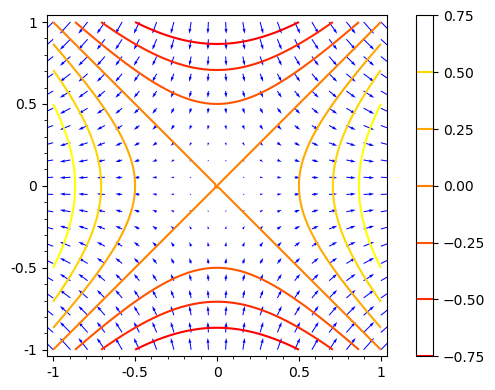

In [29]:
import matplotlib.cm
f(x,y)=x^2-y^2;
Champ=plot_vector_field(f.gradient(), (x,-1,1), (y,-1,1), color='blue')
Courbes=contour_plot(f(x,y),(x,-1,1),(y,-1,1), fill=False, cmap='autumn', colorbar="True")
show(Champ + Courbes,figsize=6)

Et voici la surface qui correspond à $f$

In [31]:
cm = colormaps.autumn
def c(x,y) : return float((f(x,y) +0.75)/1.5)
Surff=plot3d(f,(x,-1,1),(y,-1,1),color = (c, cm))
show(Surff)

Graphics3d Object

Flot d'un champ et lignes de courant : étant donné uin champs de vecteurs $\overrightarrow{\mathbf{F}}$ , une ligne de courant du champ est une courbe $\mathcal{C}$ donnée par une paramétrisation $\mathbf{r}(t)$ telle qu'en tout point le vecteur vitesse est égal au champ. En d'autres termes $\mathbf{v}(t) = \overrightarrow{\mathbf{F}}(\mathbf{r}(t))$

Trouver des lignes de courant revient à résoudre certaines équations différentielles. Par chaque point il y a une unique ligne de courant, on peut penser à la ligne de courant comme la trajectoire qu'un objet mobile suivrait, étant donné que sa vitesse doit coïncider avec le champ $\overrightarrow{\mathbf{F}}$ .

L'ensemble de toutes les lignes de courant s'appelle le flot du champ de vecteurs.

Ci-bas, trois lignes de courant, calculées "manuellement" pour le champ $\overrightarrow{\mathbf{F}}(x,y) = \mathbf{i} + (x+y) \mathbf{j}$ . L'équation différentielle associée est simplement $y′(x)=x+y$. En effet, si on a une courbe donnée explicitement $y=y(x)$, la pente de la tangente en $x_0$ et $y'(x_0)$, de sorte qu'un vecteur directeur de la tangente est $(1,y′(x_0))$. La recherche d'une ligne de courant pour le champ $\overrightarrow{\mathbf{F}}= P\mathbf{i} + Q\mathbf{j}$ c'est précisément la recherche d'une courbe dont un vecteur tangent au point $(x,y)$ et $\overrightarrow{\mathbf{F}}$.

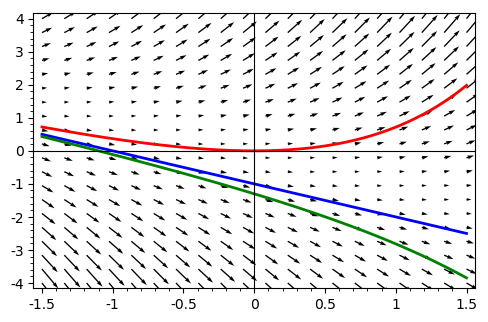

In [32]:
x,y=var('x y');
xmin=-1.5;
xmax=-xmin;
ymin=-4;
ymax=-ymin;
Champ=plot_vector_field((1,x+y), (x,xmin,xmax), (y,ymin,ymax), color='black')
c1=plot(-x-1,(x,xmin,xmax),color="blue", thickness=2)
c2=plot(e^x-x-1,(x,xmin,xmax),color="red", thickness=2)
c3=plot(-0.3*e^x-x-1,(x,xmin,xmax),color="green", thickness=2)
show(Champ+c1+c2+c3,figsize=5);